In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest
from skgof import ks_test, cvm_test, ad_test
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
from math import sqrt

### Модульное домашнее задание №2.
#### Задание 1.
Пусть $x_1, x_2, \ldots, x_n$ — выборка из распределения $\mathcal{P}$. 
Хотим проверить гипотезу: $$H_0: \mathcal{P} \sim N(0, 1)$$ с альтернативой $$H_1: \mathcal{P} \sim p \cdot N(0, 1) + (1-p) \cdot N(a, b).$$
где $a,b \in \{0.25, 0.5, 0.75, 1\} \times \{1\}$.

$\bf{Сам \ вопрос}$: Какой критерий будет мощнее для этих данных, Колмогоров-Смирнов или $\omega^2$ для выборок с размерами $n \in \{5, 10, 15, \ldots, 320\}$?

Реализация $\omega^2$ и Колмогорова-Смирнова взята отсюда: https://pypi.org/project/scikit-gof/, csm_test, ks_test соответственно. 

Для моделирования взяты смеси с параметром $p = 0.3$

In [156]:
def create_sample(a_1=0, a_2=0, var_1=1, var_2=1, n=1000, p=0.7):
    X, Y = np.random.normal(a_1, var_1, round(n * p)), np.random.normal(a_2, var_2, round(n * (1-p)))
    data = np.concatenate([X, Y])
    return data

def test(X, alpha=0.01, criterion='ks'):
    if criterion == 'ks':
        result = False if ks_test(X, norm(0, 1)).pvalue > alpha else True
    else:
        result = False if cvm_test(X, norm(0, 1)).pvalue > alpha else True
    return result

def repeat(e, var, k=100, p=0.7, n=1000):
    tmp_count_1, tmp_count_2 = 0, 0
    for i in range(k):
        data = create_sample(a_2=e, var_2=var, p=p,n=n)
        tmp_count_1 += test(data, criterion='ks')
        tmp_count_2 += test(data, criterion='cvm')
        
    return tmp_count_1/k, tmp_count_2/k

#### Моделирование корректности критериев, проверка равономерности в случае верной $H_0$
#### Видно, что функция распределения $pvalue$  в случае верной $H_0$ распределены равномерно, значит использования критерия корректно.

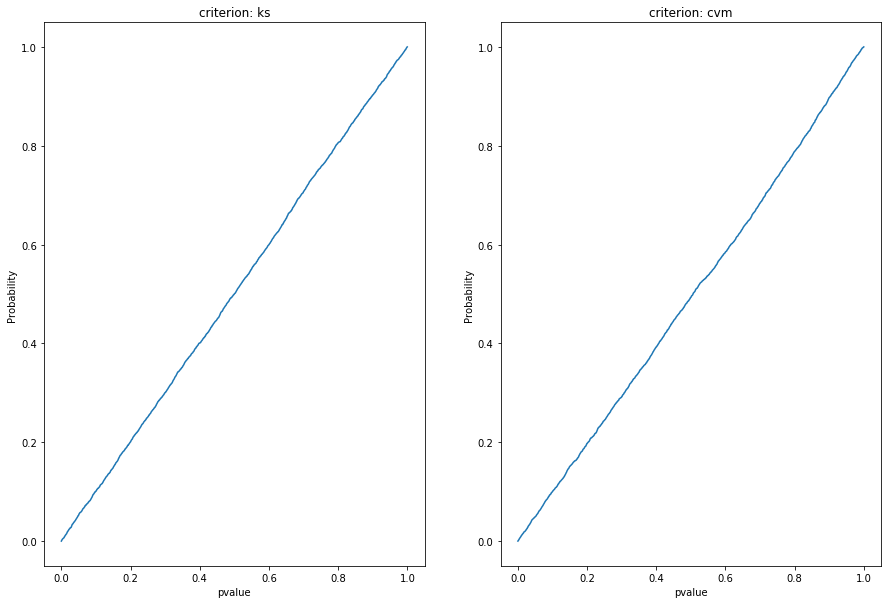

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
for index, criterion in enumerate(['ks', 'cvm']):
    y = [] 
    for iteration in range(1, 5000):
        data = norm(0, 1).rvs(1000)
        y.append(test_p(data, criterion=criterion))
    
    ax[index].plot(np.sort(y), np.linspace(0, 1, len(y), endpoint=False))
    ax[index].set(xlabel='pvalue', ylabel='Probability', title=f'criterion: {criterion}')

### Результаты
#### В целом видно, что вне зависимости от математического ожидания $M \in \{0.25, 0.5, 0.75, 1\}$  и размера выборки $n \in \{5, 10, 15 \ldots 320\} $ в большинстве своем на одних и тех же данных ... дает более бОльшую мощность по сравнению с ...

<Figure size 1080x720 with 0 Axes>

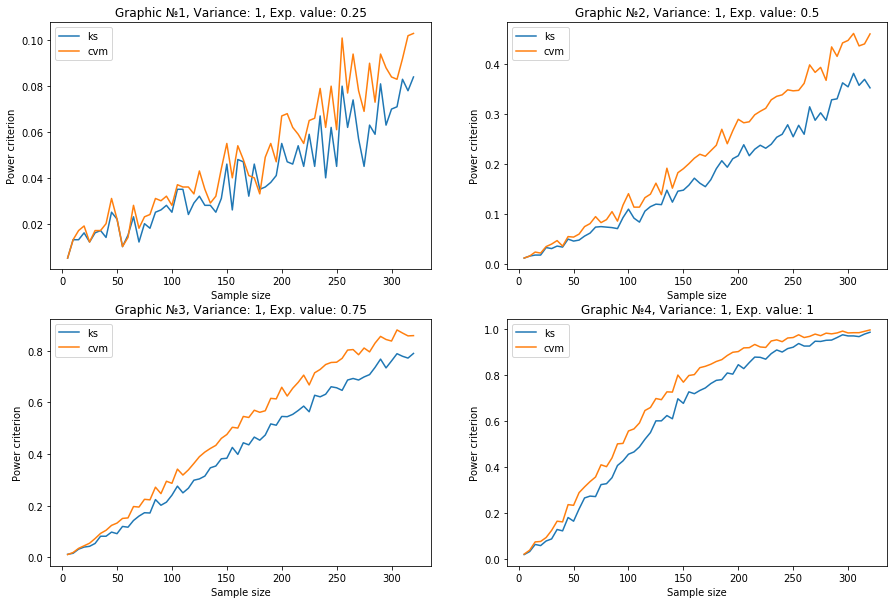

In [155]:
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(2,2, figsize=(15,10))
axes = [ax[0,0], ax[0,1], ax[1, 0], ax[1,1]]
for index, grid, e in zip([1,2,3,4], axes, [0.25, 0.5, 0.75, 1]):
    x, y_1, y_2 = [], [], []
    for n in range(5, 325, 5):
        x.append(n)
        yy_1, yy_2 = repeat(e, 1, k=1000, n=n)
        y_1.append(yy_1)
        y_2.append(yy_2)
    grid.plot(x, y_1, label='ks')
    grid.plot(x, y_2, label='cvm')
    grid.set(xlabel='Sample size', ylabel='Power criterion', title=f'Graphic №{index}, Variance: {1}, Exp. value: {e}')
    grid.legend();